In [1]:
#importing all the libraries
import os
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.callbacks import EarlyStopping
from keras.backend import clear_session

clear_session()

# Download the dataset using the below link 

In [2]:
#https://www.kaggle.com/competitions/dog-breed-identification/data?select=train

In [3]:
#train dir contains the training images
base_dir = '.'
data_dir = os.path.join(base_dir,'train')
files = os.listdir(data_dir)

In [4]:
#target information from labels.csv

labels = pd.read_csv(os.path.join(base_dir,'labels.csv'))
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
file_df = pd.DataFrame({'id':list(map(lambda x:x.replace('.jpg',''),files))})
file_df.head()

,id
0,000bec180eb18c7604dcecc8fe0dba07
1,001513dfcb2ffafc82cccf4d8bbaba97
2,001cdf01b096e06d78e9e5112d419397
3,00214f311d5d2247d5dfe4fe24b2303d
4,0021f9ceb3235effd7fcde7f7538ed62


In [6]:
#mapping file with breed, maintain file read order

label_info =  pd.merge(left = file_df, right = labels)
label_info.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
img = plt.imread(os.path.join(data_dir,files[1]))

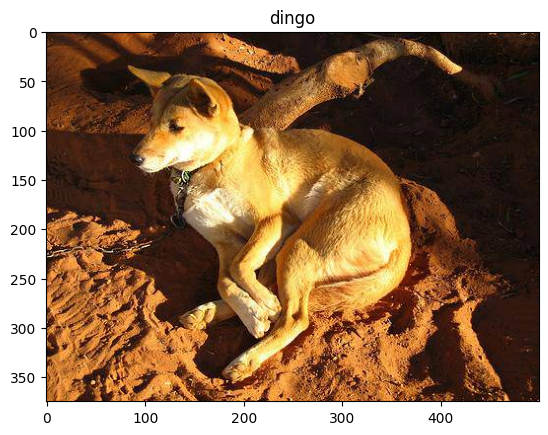

In [8]:
#showing a image

plt.imshow(img)
plt.title(label_info.iloc[1]['breed'])
plt.show()

In [9]:
# converting target to one hot vector format

num_classes = len(label_info.breed.unique())
num_classes

120

In [10]:
le = LabelEncoder()
breed = le.fit_transform(label_info.breed)
Y = np_utils.to_categorical(breed,num_classes = num_classes)

In [11]:
Y.shape

(10222, 120)

In [12]:
# converting image to numpy array
input_dim = (224, 224)

X = np.zeros((Y.shape[0], *input_dim,3))

for i,img in enumerate(files):
    image = load_img(os.path.join(data_dir,img), target_size = input_dim)
    image = img_to_array(image)
    image = image.reshape((1, *image.shape))
    image = preprocess_input(image)
    X[i] = image

In [13]:
X.shape

(10222, 224, 224, 3)

In [14]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D, Flatten, Dropout

vgg_model = VGG19(weights='imagenet', include_top=False)

x= vgg_model.output
x= GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
out = Dense(120,activation = 'softmax')(x)

model = Model(inputs=vgg_model.input, outputs=out)

for layer in vgg_model.layers[:-1]:
    layer.trainable = False
for layer in vgg_model.layers[-1:]:
    layer.trainabl= True
from keras.optimizers import Adam
opt= Adam()

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [15]:
#create callbacks
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [16]:
from keras.backend import clear_session
import tensorflow as tf

clear_session()

In [17]:
history_few_layer = model.fit(X[:1000], Y[:1000], batch_size=32, epochs=30, validation_split=0.2, verbose=2)
#history_few_layer = model.fit(X[:1000], Y[:1000], batch_size=32, epochs=30, validation_split=0.2, verbose=2, callbacks='earlystop')

Epoch 1/30
25/25 - 167s - loss: 21.1930 - accuracy: 0.0137 - val_loss: 14.0778 - val_accuracy: 0.0100 - 167s/epoch - 7s/step
Epoch 2/30
25/25 - 171s - loss: 15.7852 - accuracy: 0.0550 - val_loss: 11.2936 - val_accuracy: 0.0650 - 171s/epoch - 7s/step
Epoch 3/30
25/25 - 168s - loss: 12.4339 - accuracy: 0.0862 - val_loss: 9.7992 - val_accuracy: 0.0750 - 168s/epoch - 7s/step
Epoch 4/30
25/25 - 170s - loss: 9.4622 - accuracy: 0.1488 - val_loss: 8.4550 - val_accuracy: 0.1000 - 170s/epoch - 7s/step
Epoch 5/30
25/25 - 171s - loss: 7.1724 - accuracy: 0.2387 - val_loss: 7.8881 - val_accuracy: 0.1300 - 171s/epoch - 7s/step
Epoch 6/30
25/25 - 172s - loss: 5.4230 - accuracy: 0.3125 - val_loss: 7.3397 - val_accuracy: 0.1550 - 172s/epoch - 7s/step
Epoch 7/30
25/25 - 172s - loss: 4.3801 - accuracy: 0.3988 - val_loss: 6.8291 - val_accuracy: 0.1900 - 172s/epoch - 7s/step
Epoch 8/30
25/25 - 172s - loss: 3.4505 - accuracy: 0.4638 - val_loss: 6.6711 - val_accuracy: 0.1850 - 172s/epoch - 7s/step
Epoch 9/30


# Over all we got 93% accuracy.

In [18]:
model.save('vgg19DBPmodel.h5')

In [19]:
history_few_layer.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])